In [1]:
import pandas as pd
from arch.unitroot import ADF
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression, Lasso, Ridge

import functions 

In [2]:
df = pd.DataFrame([0.4, 0.6, 0.3, 0.2, 0.4, 0.5, 0.2, 0.1, 0.4, 0.4, 0, 0.2, -0.2, -2.8, 0.9],
            index=['2017-Q1', '2017-Q2', '2017-Q3', '2017-Q4', '2018-Q1', '2018-Q2', '2018-Q3', '2018-Q4', '2019-Q1', '2019-Q2', '2019-Q3', '2019-Q4', '2020-Q1', '2020-Q2', '2020-Q3'],
            columns=['Percentage change on previous period'])
df

,Percentage change on previous period
2017-Q1,0.4
2017-Q2,0.6
2017-Q3,0.3
2017-Q4,0.2
2018-Q1,0.4
2018-Q2,0.5
2018-Q3,0.2
2018-Q4,0.1
2019-Q1,0.4
2019-Q2,0.4


In [3]:
df.describe()

,Percentage change on previous period
count,15.000000
mean,0.106667
std,0.844703
min,-2.800000
25%,0.150000
50%,0.300000
75%,0.400000
max,0.900000


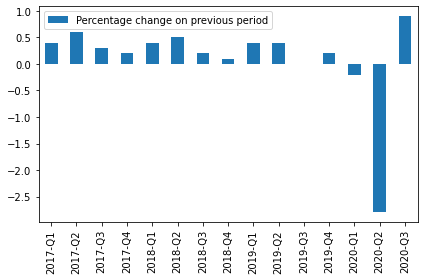

In [4]:
df.plot.bar()
plt.tight_layout()
plt.show()

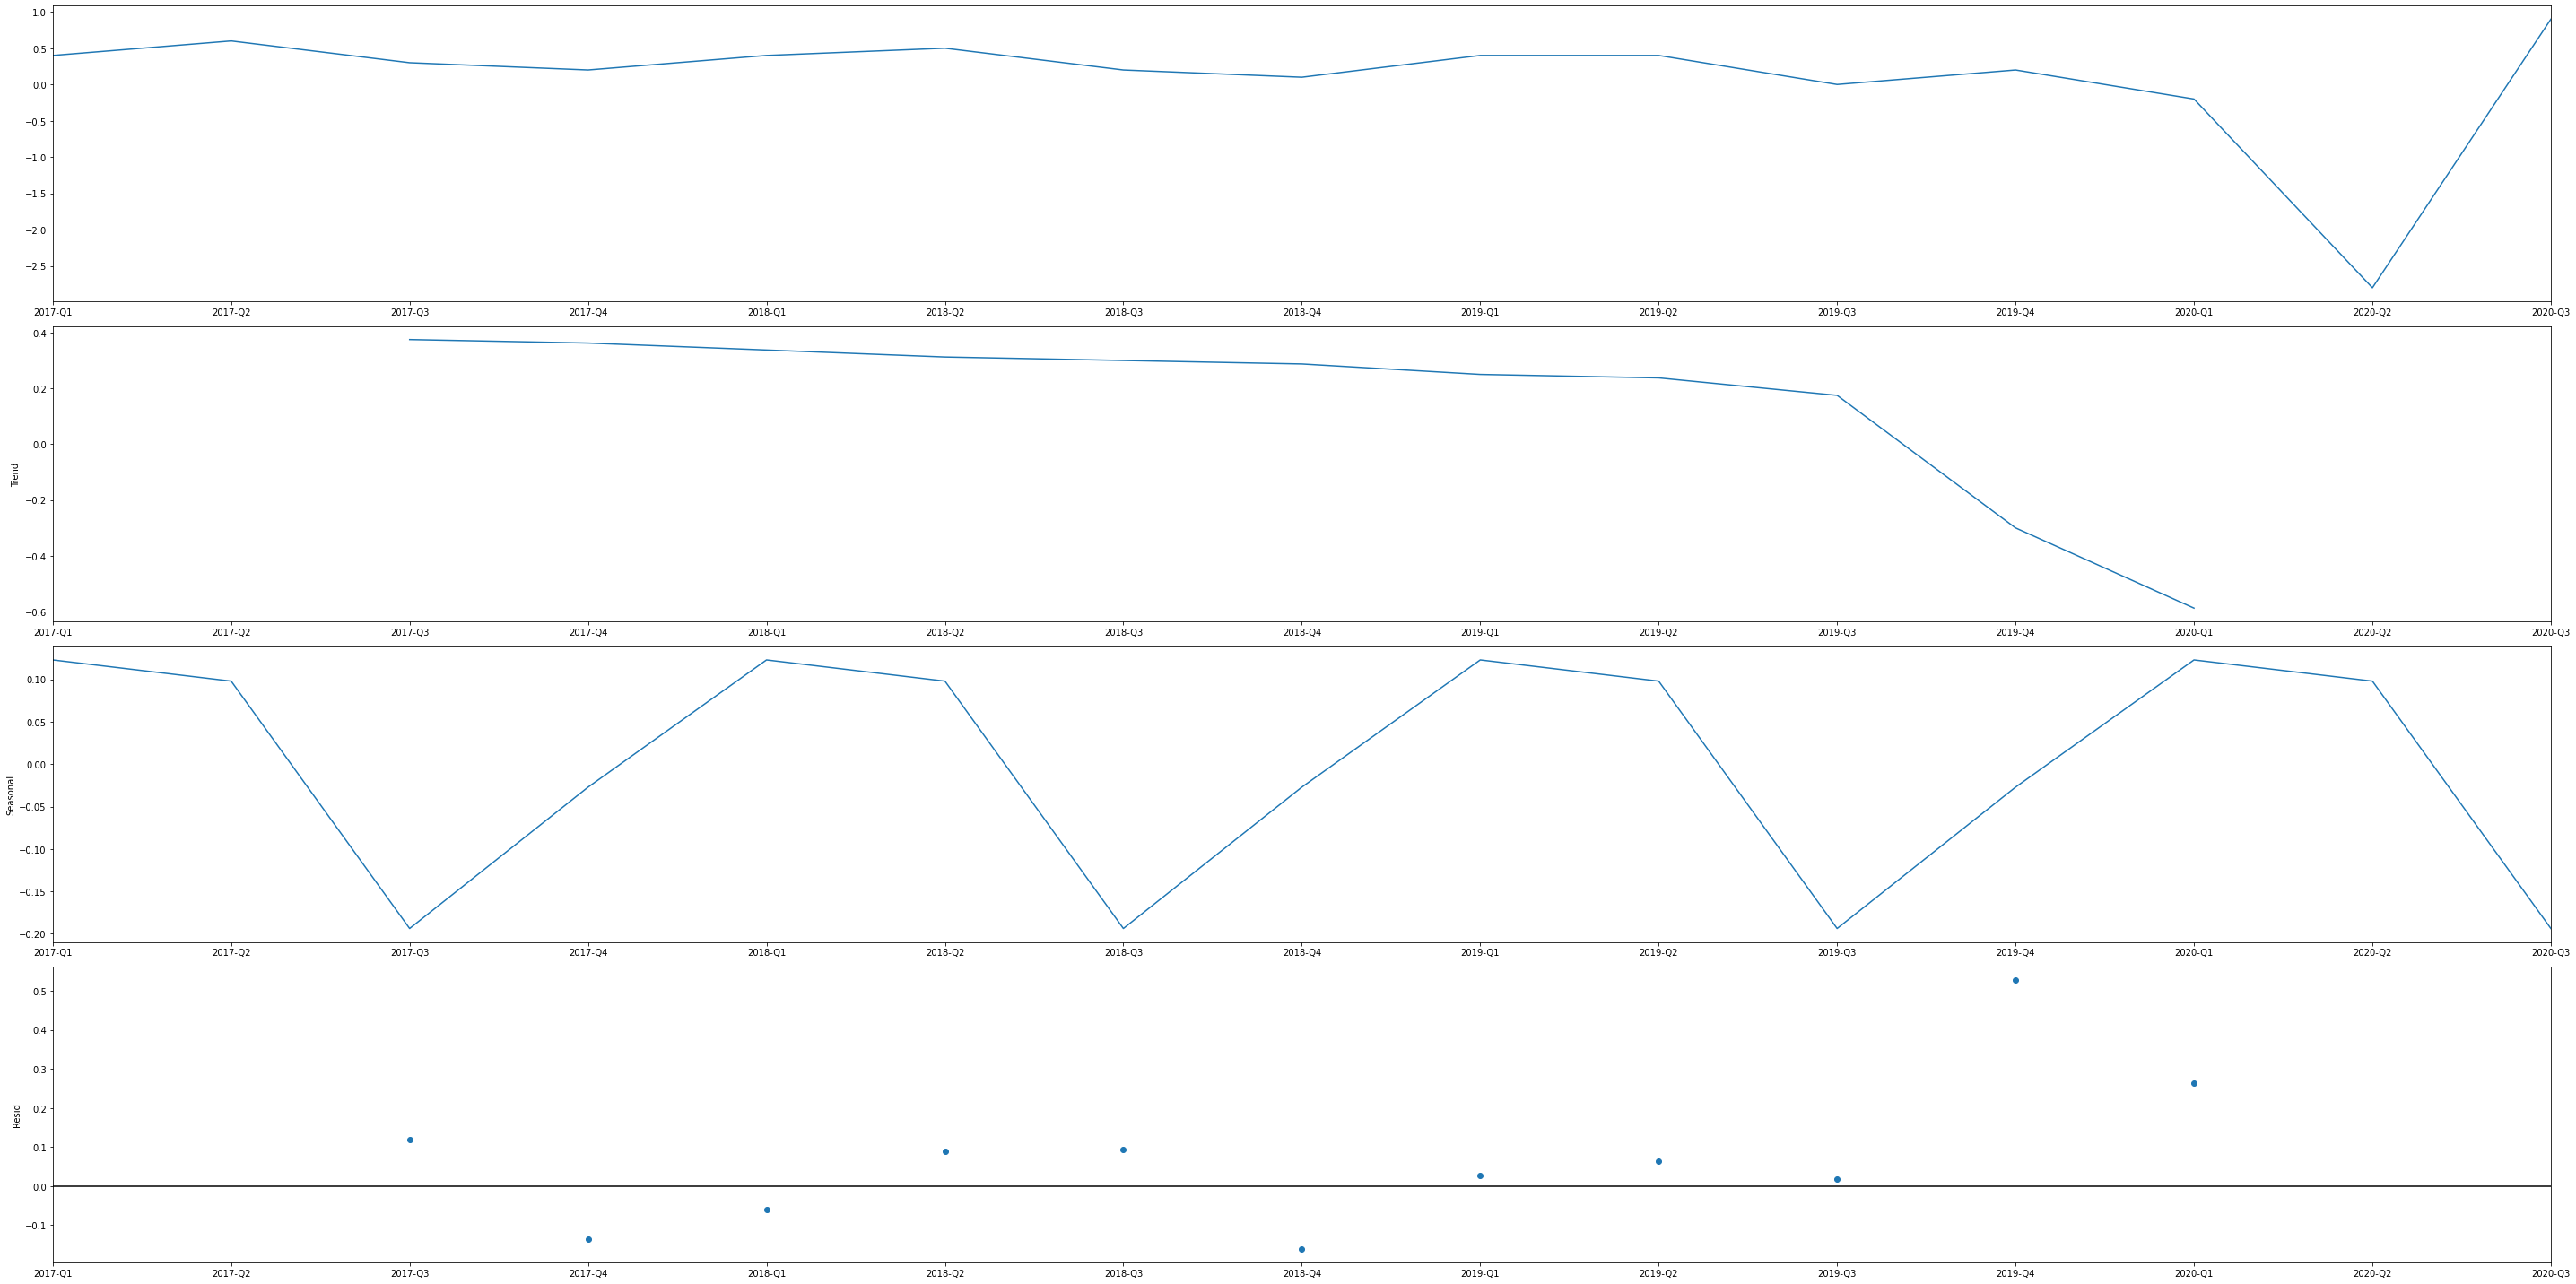

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

fig = seasonal_decompose(df, model='additive', freq=4).plot()
fig.set_figheight(20)
fig.set_figwidth(40)
plt.tight_layout()

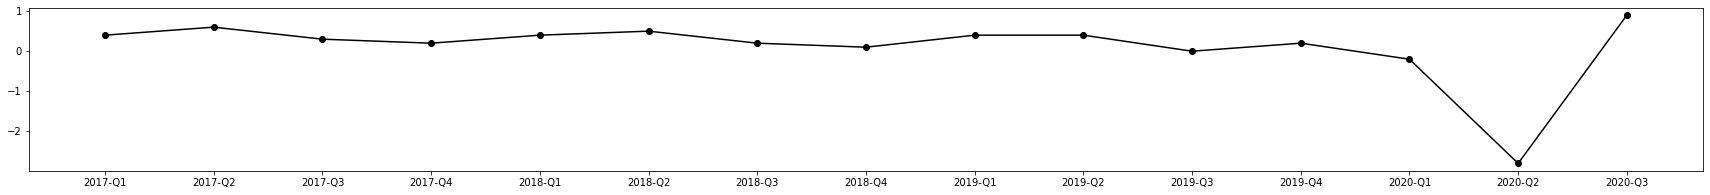

In [6]:
 _, ax = plt.subplots(1, 1, figsize=(30, 3))
ax.plot(df['Percentage change on previous period'], color='black', marker='o', label='original')
plt.show()

In [7]:
df = df.reset_index(drop=False)
df

,index,Percentage change on previous period
0,2017-Q1,0.4
1,2017-Q2,0.6
2,2017-Q3,0.3
3,2017-Q4,0.2
4,2018-Q1,0.4
5,2018-Q2,0.5
6,2018-Q3,0.2
7,2018-Q4,0.1
8,2019-Q1,0.4
9,2019-Q2,0.4


In [8]:
index = df['index'].str[-1].astype(int)

In [9]:
for i in range(1, 5):
    df[f'is_q{i}'] = (index == i).astype(int)

In [10]:
df

,index,Percentage change on previous period,is_q1,is_q2,is_q3,is_q4
0,2017-Q1,0.4,1,0,0,0
1,2017-Q2,0.6,0,1,0,0
2,2017-Q3,0.3,0,0,1,0
3,2017-Q4,0.2,0,0,0,1
4,2018-Q1,0.4,1,0,0,0
5,2018-Q2,0.5,0,1,0,0
6,2018-Q3,0.2,0,0,1,0
7,2018-Q4,0.1,0,0,0,1
8,2019-Q1,0.4,1,0,0,0
9,2019-Q2,0.4,0,1,0,0


In [11]:
for i in range(1, 5):
    df[f'shift_{i}'] = df['Percentage change on previous period'].shift(i)
df

,index,Percentage change on previous period,is_q1,is_q2,is_q3,is_q4,shift_1,shift_2,shift_3,shift_4
0,2017-Q1,0.4,1,0,0,0,NaN,NaN,NaN,NaN
1,2017-Q2,0.6,0,1,0,0,0.4,NaN,NaN,NaN
2,2017-Q3,0.3,0,0,1,0,0.6,0.4,NaN,NaN
3,2017-Q4,0.2,0,0,0,1,0.3,0.6,0.4,NaN
4,2018-Q1,0.4,1,0,0,0,0.2,0.3,0.6,0.4
5,2018-Q2,0.5,0,1,0,0,0.4,0.2,0.3,0.6
6,2018-Q3,0.2,0,0,1,0,0.5,0.4,0.2,0.3
7,2018-Q4,0.1,0,0,0,1,0.2,0.5,0.4,0.2
8,2019-Q1,0.4,1,0,0,0,0.1,0.2,0.5,0.4
9,2019-Q2,0.4,0,1,0,0,0.4,0.1,0.2,0.5


In [12]:
df = df.iloc[4:].reset_index(drop=True).reset_index(drop=False)
df

,level_0,index,Percentage change on previous period,is_q1,is_q2,is_q3,is_q4,shift_1,shift_2,shift_3,shift_4
0,0,2018-Q1,0.4,1,0,0,0,0.2,0.3,0.6,0.4
1,1,2018-Q2,0.5,0,1,0,0,0.4,0.2,0.3,0.6
2,2,2018-Q3,0.2,0,0,1,0,0.5,0.4,0.2,0.3
3,3,2018-Q4,0.1,0,0,0,1,0.2,0.5,0.4,0.2
4,4,2019-Q1,0.4,1,0,0,0,0.1,0.2,0.5,0.4
5,5,2019-Q2,0.4,0,1,0,0,0.4,0.1,0.2,0.5
6,6,2019-Q3,0.0,0,0,1,0,0.4,0.4,0.1,0.2
7,7,2019-Q4,0.2,0,0,0,1,0.0,0.4,0.4,0.1
8,8,2020-Q1,-0.2,1,0,0,0,0.2,0.0,0.4,0.4
9,9,2020-Q2,-2.8,0,1,0,0,-0.2,0.2,0.0,0.4


In [13]:
df = df.drop(columns=['index'])
df

,level_0,Percentage change on previous period,is_q1,is_q2,is_q3,is_q4,shift_1,shift_2,shift_3,shift_4
0,0,0.4,1,0,0,0,0.2,0.3,0.6,0.4
1,1,0.5,0,1,0,0,0.4,0.2,0.3,0.6
2,2,0.2,0,0,1,0,0.5,0.4,0.2,0.3
3,3,0.1,0,0,0,1,0.2,0.5,0.4,0.2
4,4,0.4,1,0,0,0,0.1,0.2,0.5,0.4
5,5,0.4,0,1,0,0,0.4,0.1,0.2,0.5
6,6,0.0,0,0,1,0,0.4,0.4,0.1,0.2
7,7,0.2,0,0,0,1,0.0,0.4,0.4,0.1
8,8,-0.2,1,0,0,0,0.2,0.0,0.4,0.4
9,9,-2.8,0,1,0,0,-0.2,0.2,0.0,0.4


In [14]:
df = df.rename(columns={'level_0': 'index'})
df

,index,Percentage change on previous period,is_q1,is_q2,is_q3,is_q4,shift_1,shift_2,shift_3,shift_4
0,0,0.4,1,0,0,0,0.2,0.3,0.6,0.4
1,1,0.5,0,1,0,0,0.4,0.2,0.3,0.6
2,2,0.2,0,0,1,0,0.5,0.4,0.2,0.3
3,3,0.1,0,0,0,1,0.2,0.5,0.4,0.2
4,4,0.4,1,0,0,0,0.1,0.2,0.5,0.4
5,5,0.4,0,1,0,0,0.4,0.1,0.2,0.5
6,6,0.0,0,0,1,0,0.4,0.4,0.1,0.2
7,7,0.2,0,0,0,1,0.0,0.4,0.4,0.1
8,8,-0.2,1,0,0,0,0.2,0.0,0.4,0.4
9,9,-2.8,0,1,0,0,-0.2,0.2,0.0,0.4


In [15]:
regressor = LinearRegression()
regressor.fit(
    df.drop(columns=['Percentage change on previous period']),
    df['Percentage change on previous period']
)

LinearRegression()

In [16]:
perc_pred = regressor.predict(df.drop(columns=['Percentage change on previous period']))

In [17]:
list(perc_pred)

[0.6069838812114354,
 0.5404360463768607,
 0.5338962778903227,
 -0.14268210707845164,
 0.013790210049556162,
 0.1723977914895367,
 -0.3061383054178983,
 0.4426821070784519,
 -0.0207740912609915,
 -2.6128338378664044,
 0.872242027527574]

In [18]:
df['Percentage change on previous period'].values[-1]

0.9

In [19]:
regressor.predict([[11, 0, 0, 0, 1, 0.9, -2.8, -0.2, 0.2]])[0]

6.890215612555735

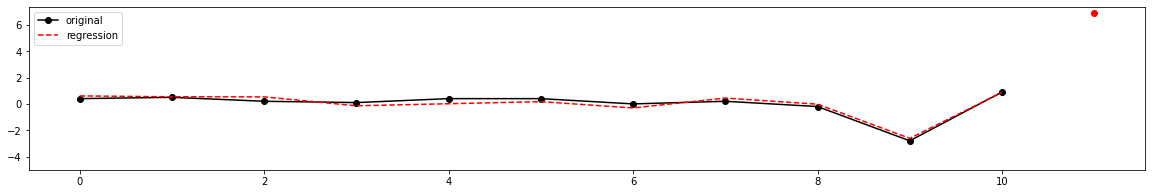

In [20]:
functions.multiple_plots(
    df['Percentage change on previous period'], 
    fits=[list(perc_pred)], 
    forecasts=[pd.DataFrame(index=[11], data=[6.890215612555735])],
    colours=['red'], 
    labels=['regression']
)

In [21]:
regressor = Lasso(alpha=0.1)
regressor.fit(
    df.drop(columns=['Percentage change on previous period']),
    df['Percentage change on previous period']
)

Lasso(alpha=0.1)

In [22]:
pred = regressor.predict(df.drop(columns=['Percentage change on previous period']))

In [23]:
list(pred)

[0.77983073402442,
 0.2947183788314828,
 0.36150948146919115,
 0.30717905170816273,
 0.18403520127309614,
 -0.33548386425686016,
 -0.23428605128213287,
 -0.25420977070614204,
 -0.48057375215226605,
 -0.7592458453230885,
 0.2365264364141364]

In [24]:
df['Percentage change on previous period'].values[-1]

0.9

In [25]:
regressor.predict([[11, 0, 0, 0, 1, 0.9, -2.8, -0.2, 0.2]])[0]

-1.1940724068276571

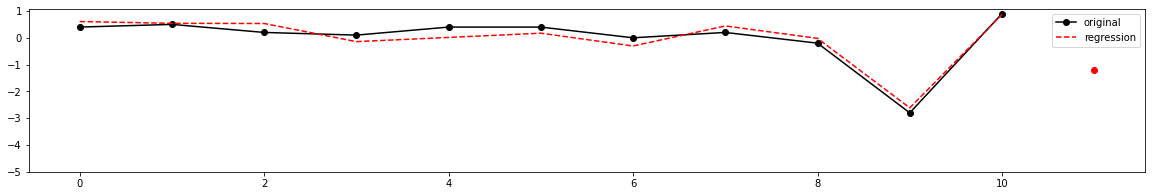

In [26]:
functions.multiple_plots(
    df['Percentage change on previous period'], 
    fits=[list(perc_pred)], 
    forecasts=[pd.DataFrame(index=[11], data=[-1.1940724068276571])],
    colours=['red'], 
    labels=['regression']
)

In [27]:
# the mape
# the r squared 